# S02 T05: Exploración de les datos

In [32]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


- Ejercicio 1

Descarga el data set Airlines Delay: Airline on-time statistics and delay y cargalo en un pandas Dataframe.

Explora los datos que contiene, y queda únicamente con las columnas que consideres relevantes.

In [2]:
df = pd.read_csv("DelayedFlights.csv")
df

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


- _**En esta primer parte vamos a analizar un poco las columnas y los resultados para averiguar que sirve y que no**_

In [3]:
df.columns # vamos a averiguar que columnas hay

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
# también vamos a averiguar cuantas columnas y filas hay
df.shape

(1936758, 30)

In [6]:
#vemos que hay casi unos 2 millones de entradas
# vamos a hacer limpieza de duplicados en las filas  
df.drop_duplicates( inplace = True)
df.shape



(1936758, 30)

In [7]:
#podemos ver que no hay duplicados. 
# vamos a simplemente  las columnas de tiempo deptime y arrtime, para saber si se refieren a minutos de vuelo (min), 
#o a la hora en formato hh:mm 
df2Dep = df [ "DepTime"]
df2Arr = df [ "ArrTime"]
print (df2Dep.max())
print (df2Dep.min())
print (df2Arr.max())
print (df2Arr.min())

2400.0
1.0
2400.0
1.0


 Podemos ver que DepTime i Arrtime son las horas y minutos hh:mm  pasados en formato hhmm, sin el **":"**

In [8]:
# analizamos un poco las variables relacionadas con el tiempo ( min, segundos)
df3 = df [['DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
df3

,DepTime,CRSDepTime,ArrTime,CRSArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2003.0,1955,2211.0,2225,128.0,150.0,116.0,-14.0,8.0,NaN,NaN,NaN,NaN,NaN
1,754.0,735,1002.0,1000,128.0,145.0,113.0,2.0,19.0,NaN,NaN,NaN,NaN,NaN
2,628.0,620,804.0,750,96.0,90.0,76.0,14.0,8.0,NaN,NaN,NaN,NaN,NaN
3,1829.0,1755,1959.0,1925,90.0,90.0,77.0,34.0,34.0,2.0,0.0,0.0,0.0,32.0
4,1940.0,1915,2121.0,2110,101.0,115.0,87.0,11.0,25.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,1250.0,1220,1617.0,1552,147.0,152.0,120.0,25.0,30.0,3.0,0.0,0.0,0.0,22.0
1936754,657.0,600,904.0,749,127.0,109.0,78.0,75.0,57.0,0.0,57.0,18.0,0.0,0.0
1936755,1007.0,847,1149.0,1010,162.0,143.0,122.0,99.0,80.0,1.0,0.0,19.0,0.0,79.0
1936756,1251.0,1240,1446.0,1437,115.0,117.0,89.0,9.0,11.0,NaN,NaN,NaN,NaN,NaN


Podemos ver DepDelay y ArrDelay **recogen la diferencia ente el tiempo esperado y el tiempo real** de llegada o salida, 
así como **elapsed time** nos da información del tiempo transcurrido, por lo que las primeras cuatro columnas nos informan
de los mismo que las cinco siguientes. 


In [9]:
# construimos un primer data frame con el primer filtrado, dejando fuera las primeras cuatro columnas mencionadad justo arriba
# así como las colunas que tienen que ver con la compañía y el número de serie del avión

df4 = df [[ 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 
           'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

# analicemos un poco la variable " UniqueCarrier" para ver que nos aporta. 
df4 [[ "UniqueCarrier"]]. value_counts() 

UniqueCarrier
WN               377602
AA               191865
MQ               141920
UA               141426
OO               132433
DL               114238
XE               103663
CO               100195
US                98425
EV                81877
NW                79108
FL                71284
YV                67063
B6                55315
OH                52657
9E                51885
AS                39293
F9                28269
HA                 7490
AQ                  750
dtype: int64

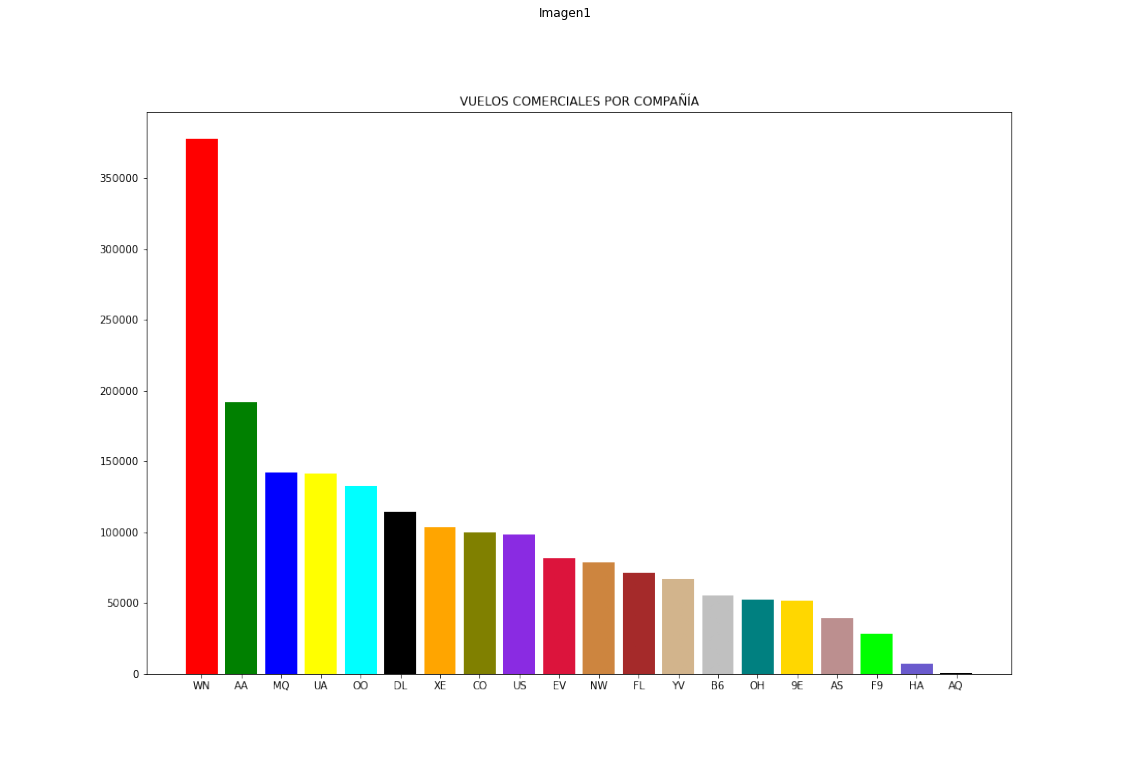

In [34]:
img1 = mpimg.imread("fig1.png")
plt.figure(figsize=(20, 20))
plt.imshow(img1)
plt.title('Imagen1') 
plt.axis('off')
plt.show()

In [10]:
df4 [[ "Cancelled"]]. value_counts()# miramos también los vuelos cancelados


Cancelled
0            1936125
1                633
dtype: int64

In [11]:
# observamos unos 600 vuelos sobre dos millones 
df4 [[ "CancellationCode"]]. value_counts() # así como miramos sus códigos de cancelación

CancellationCode
N                   1936125
B                       307
A                       246
C                        80
dtype: int64

In [12]:
# los términos A, B y C no nos aportan mucho, así que eliminamos esta columna, pero si dejaremos la columna uniquecarrier 
# para saber si hay compañías más lentas que otras. 
# miramos los vuelos desviados
df4 [[ "Diverted"]]. value_counts()

Diverted
0           1929004
1              7754
dtype: int64

In [13]:
# dejamos estas columnas

df5 = df [[ 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 
           'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 
       'Cancelled', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]
df5



,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,WN,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,WN,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,WN,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,0,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,DL,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,0,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,DL,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,0,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,0,0,NaN,NaN,NaN,NaN,NaN


___________________________________________________________________________________________________________

- **Ejercicio 2:Haga un informe completo de la fecha set:.**

* Resume estadísticamente las columnas de interés

* Encuentra cuántos datos faltantes hay por columna

* Crea columnas nuevas (velocidad media del vuelo, si ha llegado tarde o no...)

* Tabla de las aerolíneas con mayores retrasos acumulados

* ¿Cuáles son los vuelos más largos? ¿Y los más atrasados?

* Etc.

- Análisis de los valores nulo 

In [14]:
# vamos a ver primero los datos faltantes por columnas 
df5.isnull().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
UniqueCarrier             0
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
Cancelled                 0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [15]:
# podemos ver que 'ActualElapsedTime', 'AirTime', 'ArrDelay, tienen 8387 datos faltantes
# vamos a hacer un filtro para ver si se observa alguna relación entre ellos, antes de asignarles
# un valor a estos nulos. Es fácil ver que los 8387 vuelos sin tiempo registrados
# coinciden con los vuelos derivados y cancelados. 7754 +633
# así que vamos a ver los vuelos cancelados
df5 [df5["Cancelled"]==1 ]

#también se ve que las últimas 5 columnas tiene más valores vacíos ya que son la causa del retraso 
# y registran el tiempo asignado a esa causa, por lo cual es más fácil que contengan valores vacíos

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1542406,2008,10,27,1,WN,NaN,60.0,NaN,NaN,122.0,HOU,HRL,276,1,0,NaN,NaN,NaN,NaN,NaN
1546593,2008,10,25,6,XE,NaN,107.0,NaN,NaN,28.0,CLT,EWR,529,1,0,NaN,NaN,NaN,NaN,NaN
1547161,2008,10,22,3,XE,NaN,72.0,NaN,NaN,10.0,JAN,IAH,351,1,0,NaN,NaN,NaN,NaN,NaN
1547178,2008,10,22,3,XE,NaN,63.0,NaN,NaN,18.0,IAH,BTR,253,1,0,NaN,NaN,NaN,NaN,NaN
1548271,2008,10,15,3,XE,NaN,72.0,NaN,NaN,118.0,IAH,HRL,295,1,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934590,2008,12,7,7,DL,NaN,130.0,NaN,NaN,42.0,BUF,ATL,712,1,0,NaN,NaN,NaN,NaN,NaN
1935491,2008,12,10,3,DL,NaN,125.0,NaN,NaN,9.0,ATL,IAH,689,1,0,NaN,NaN,NaN,NaN,NaN
1935651,2008,12,10,3,DL,NaN,123.0,NaN,NaN,12.0,ATL,BUF,712,1,0,NaN,NaN,NaN,NaN,NaN
1935876,2008,12,11,4,DL,NaN,144.0,NaN,NaN,31.0,ATL,JFK,760,1,0,NaN,NaN,NaN,NaN,NaN


In [16]:
# vamos a intentar encontrar una causa a los 198 nulos CRSElapsedTime
df5[df5.CRSElapsedTime.isnull()]

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
138532,2008,1,31,4,9E,NaN,NaN,NaN,NaN,30.0,ATL,AUS,813,0,1,NaN,NaN,NaN,NaN,NaN
138574,2008,1,10,4,9E,NaN,NaN,NaN,NaN,50.0,IAH,MEM,469,0,1,NaN,NaN,NaN,NaN,NaN
138697,2008,1,7,1,9E,NaN,NaN,NaN,NaN,15.0,MSP,CID,221,0,1,NaN,NaN,NaN,NaN,NaN
138786,2008,1,5,6,9E,NaN,NaN,NaN,NaN,71.0,IDA,MSP,939,0,1,NaN,NaN,NaN,NaN,NaN
138946,2008,1,17,4,9E,NaN,NaN,NaN,NaN,37.0,MSP,TVC,375,0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501260,2008,9,14,7,9E,NaN,NaN,NaN,NaN,8.0,MSP,SDF,603,0,1,NaN,NaN,NaN,NaN,NaN
1501426,2008,9,28,7,9E,NaN,NaN,NaN,NaN,8.0,MEM,CHA,271,0,1,NaN,NaN,NaN,NaN,NaN
1501463,2008,9,26,5,9E,NaN,NaN,NaN,NaN,7.0,MEM,CHA,271,0,1,NaN,NaN,NaN,NaN,NaN
1501786,2008,9,11,4,9E,NaN,NaN,NaN,NaN,12.0,OMA,DTW,651,0,1,NaN,NaN,NaN,NaN,NaN


In [17]:
df5[["Diverted"]][df5.CRSElapsedTime.isnull()].value_counts()
# vemos que todos los nulos son de vuelos derivados por lo que tampoco los vamos a cambiar, sustituyendo el valor por una media
# o algún método numérico


Diverted
1           198
dtype: int64

______________________________________________________________________________________________________________

- Resumen estadístico de las columnas de interés

In [19]:
df6 = df [[  'ActualElapsedTime', 'AirTime', 'ArrDelay',
        'Distance']]

df7 = df6.describe()
df7

,ActualElapsedTime,AirTime,ArrDelay,Distance
count,1.928371e+06,1.928371e+06,1.928371e+06,1.936758e+06
mean,1.333059e+02,1.082771e+02,4.219988e+01,7.656862e+02
std,7.206007e+01,6.864261e+01,5.678472e+01,5.744797e+02
min,1.400000e+01,0.000000e+00,-1.090000e+02,1.100000e+01
25%,8.000000e+01,5.800000e+01,9.000000e+00,3.380000e+02
50%,1.160000e+02,9.000000e+01,2.400000e+01,6.060000e+02
75%,1.650000e+02,1.370000e+02,5.600000e+01,9.980000e+02
max,1.114000e+03,1.091000e+03,2.461000e+03,4.962000e+03


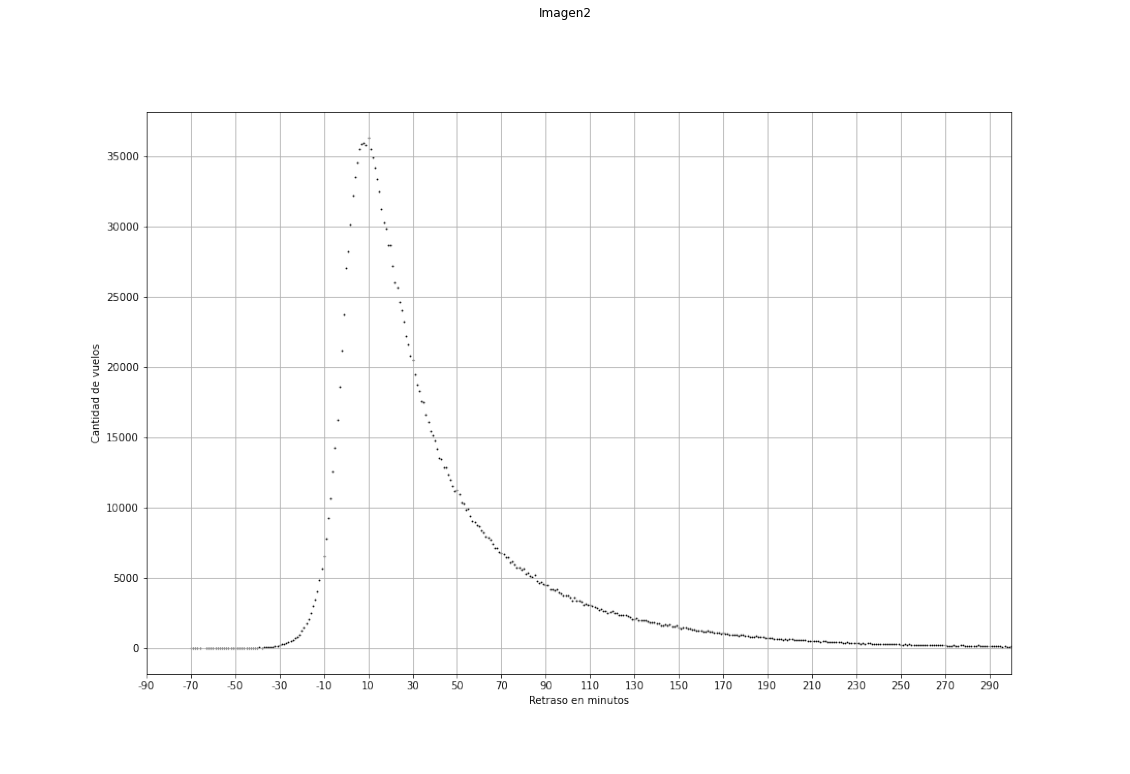

In [35]:
img2 = mpimg.imread("fig2.png")
plt.figure(figsize=(20, 20))
plt.imshow(img2)
plt.title('Imagen2') 
plt.axis('off')
plt.show()

Observamos que la media de un vuelo, desde que sale, despega y  hasta que aterriza, se encuentra alrededor de las 2 horas 
y 13 minutos. Por otro lado la media del retraso en cada vuelo, o sea, el retraso hasta llegar a destino se encuentra en 
los 42 minutos, siendo la media de tiempo de la que dura el viaje en el aire es de 108 minutos. También podemos ver que hay
una relación casi lineal entre el tiempo de retraso en el despegue, con el retraso de llegada

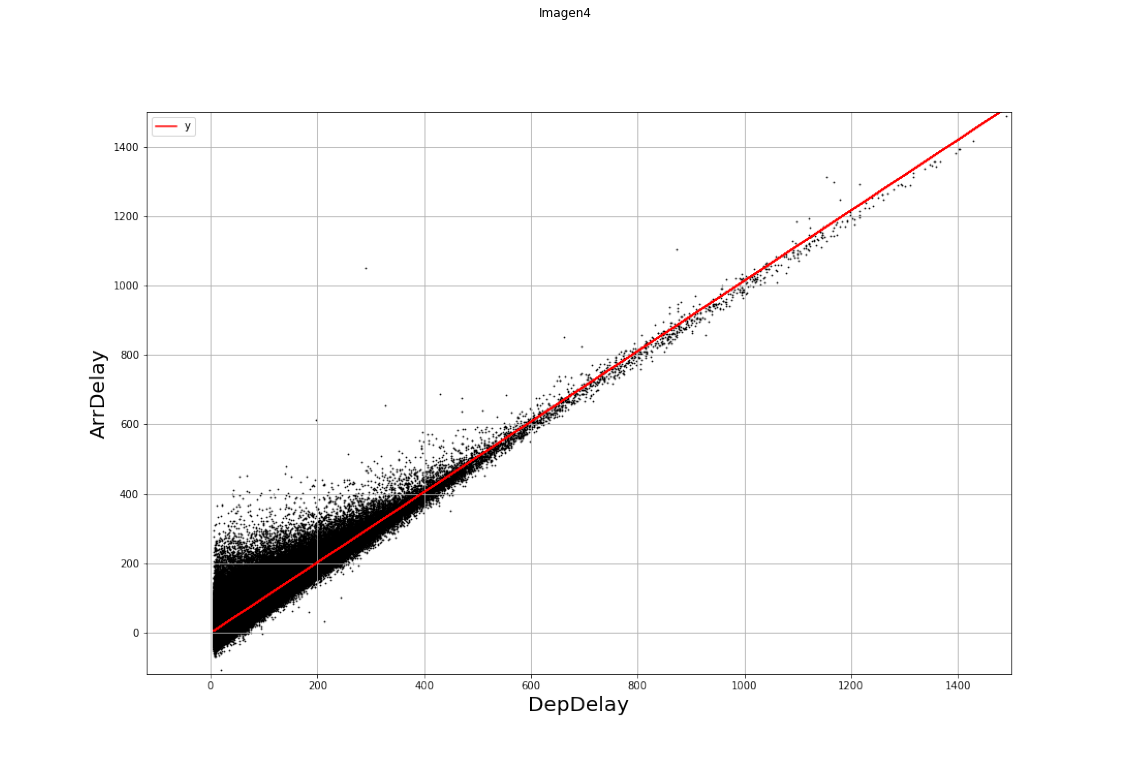

In [38]:
img4 = mpimg.imread("fig4.png")
plt.figure(figsize=(20, 20))
plt.imshow(img4)
plt.title('Imagen4') 
plt.axis('off')
plt.show()

________________________________________________________________________________________________________________________

* Tabla de las aerolíneas con mayores retrasos acumulados

In [20]:
df8 = df5 [["UniqueCarrier","ArrDelay"]]
comp_delay= df8.groupby('UniqueCarrier')['ArrDelay'].sum().sort_values()

 # podremos ver el retraso de las compañías 
for index, value in comp_delay.items():
    if value > 5000000:
        print(index, value)
    

XE 5176042.0
OO 5978936.0
MQ 6396704.0
UA 6733013.0
AA 8889066.0
WN 11319092.0


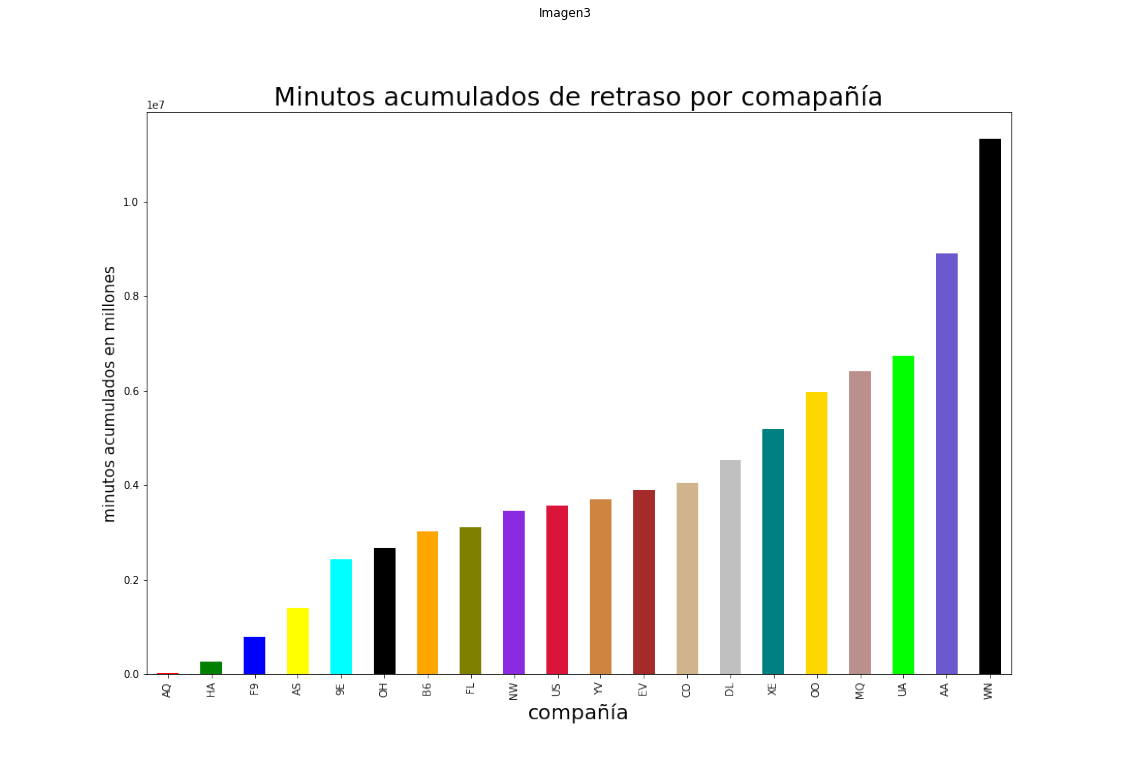

In [49]:
img3 = mpimg.imread("fig3.png")


plt.figure(figsize=(20,20))
plt.imshow(img3)
plt.title('Imagen3') 
plt.axis('off')
plt.show()



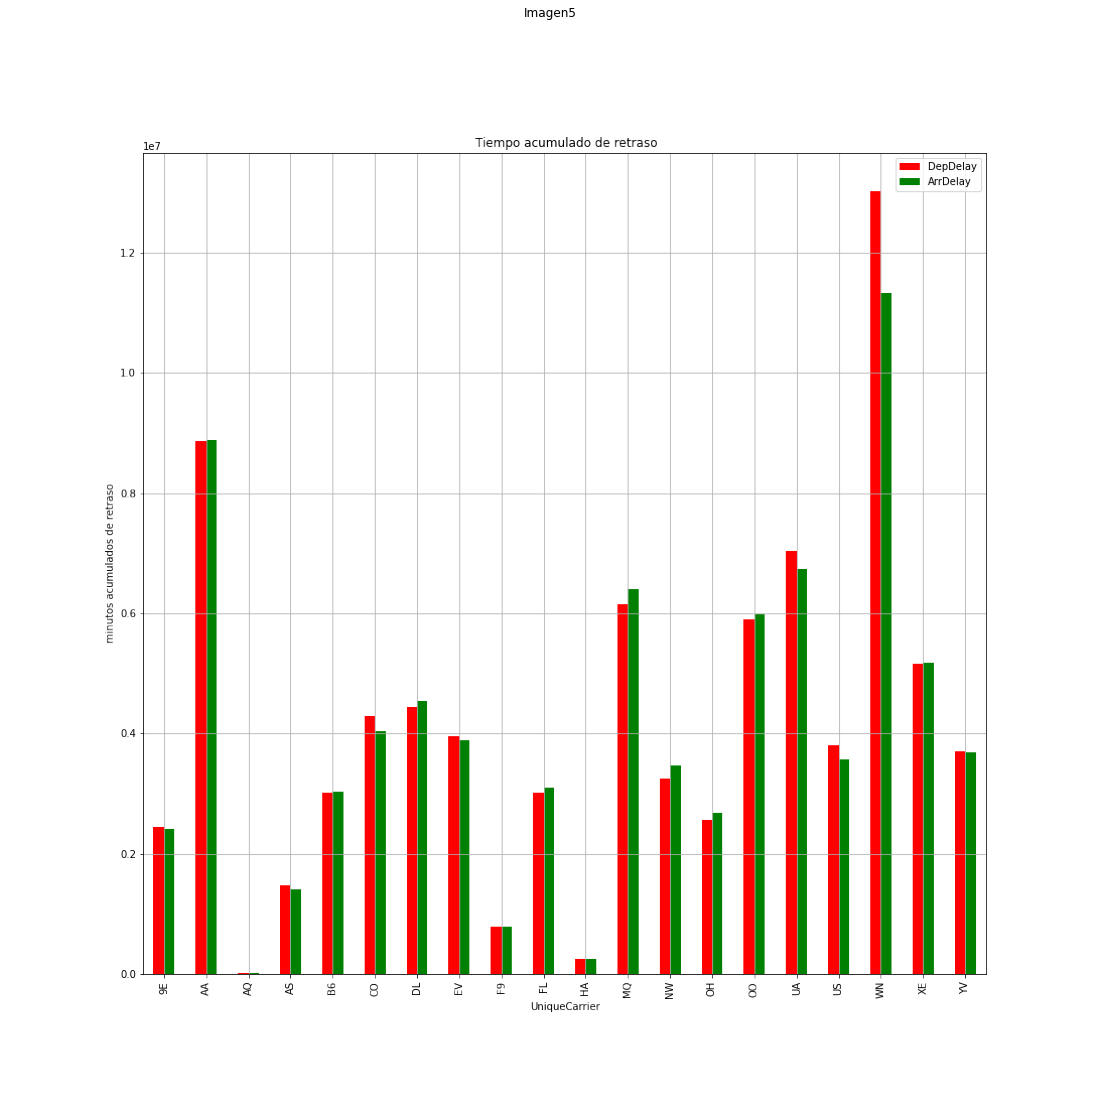

In [50]:
img5 = mpimg.imread("fig5.png")
plt.figure(figsize=(20,20))
plt.imshow(img5)
plt.title('Imagen5') 
plt.axis('off')
plt.show()



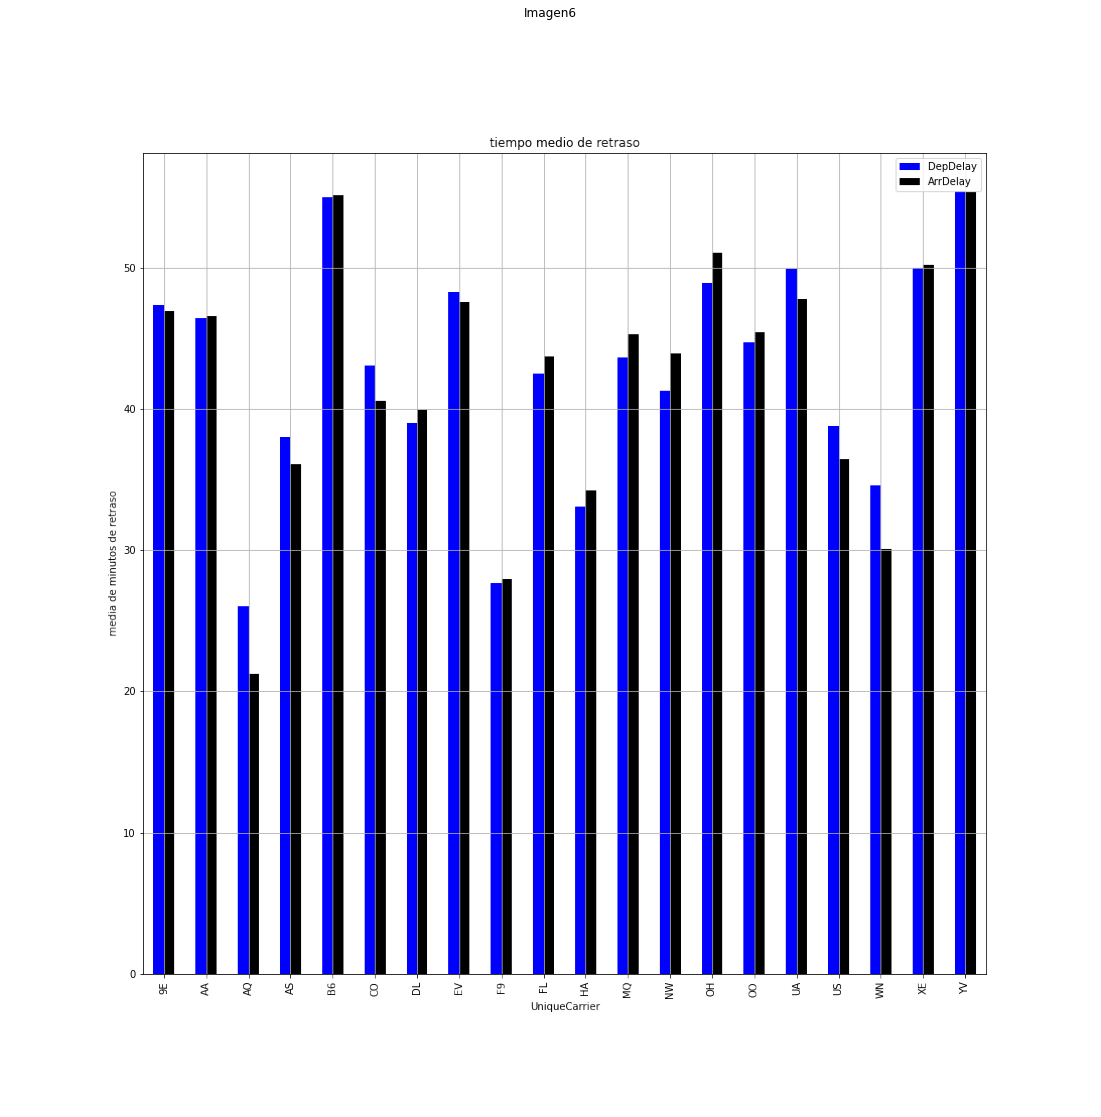

In [51]:
img6 = mpimg.imread("fig6.png")
plt.figure(figsize=(20,20))
plt.imshow(img6)
plt.title('Imagen6') 
plt.axis('off')
plt.show()


________________________________________________________________________________________________

* Crea columnas nuevas (velocidad media del vuelo, si ha llegado tarde o no...)

In [21]:
# fragmentamos el DF en 3 columnas,  

time=df5["AirTime"]# sea el tiempo del viaje
dist= df5["Distance"]# la distancia reccorida
retraso = df5["ArrDelay"]# si ha llegado tarde al aeropuerto
vel = dist/ time # cálculo de la columna velocidad 
vel = pd.Series([round(y,2)for y in vel])

vlista = vel.tolist()# pasamos la Serie a Lista 
# vamos a insertar la velocidad 
df9 = df5
df9.insert(13,"Velocidad",vlista)
df9




,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,Dest,Distance,Velocidad,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,WN,128.0,150.0,116.0,-14.0,8.0,...,TPA,810,6.98,0,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,WN,128.0,145.0,113.0,2.0,19.0,...,TPA,810,7.17,0,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,WN,96.0,90.0,76.0,14.0,8.0,...,BWI,515,6.78,0,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,WN,90.0,90.0,77.0,34.0,34.0,...,BWI,515,6.69,0,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,WN,101.0,115.0,87.0,11.0,25.0,...,JAX,688,7.91,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,DL,147.0,152.0,120.0,25.0,30.0,...,ATL,906,7.55,0,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,DL,127.0,109.0,78.0,75.0,57.0,...,ATL,481,6.17,0,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,DL,162.0,143.0,122.0,99.0,80.0,...,IAH,689,5.65,0,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,DL,115.0,117.0,89.0,9.0,11.0,...,ATL,533,5.99,0,0,NaN,NaN,NaN,NaN,NaN


In [23]:
# vamos a convertir la serie en una mascara array, para encontrar los valores con retraso a su llegada
# para luego concertirla en una serie y adjuntarla al DF


retarr = retraso.to_numpy()
def fun ( mat):# buscamos los valores ciertos o falso 
    mask = (mat > 0)
    return mask
vect =np. vectorize ( fun)# vectoriza el cálculo en una sola operación 
mascara = np.array (vect (retarr))
np.unique(mascara, return_counts=True)
        


(array([False,  True]), array([ 213343, 1723415], dtype=int64))

In [24]:
mask_DF= pd.Series(mascara.copy())

mask_DF= mask_DF.map({True: 'yes', False: 'no'}) 
mask_DF=mask_DF.to_frame(name= "Delay")
mask_DF

,Delay
0,no
1,yes
2,yes
3,yes
4,yes
...,...
1936753,yes
1936754,yes
1936755,yes
1936756,yes


In [25]:
df10=pd.concat([df9,mask_DF], axis=1)
df10

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,Distance,Velocidad,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
0,2008,1,3,4,WN,128.0,150.0,116.0,-14.0,8.0,...,810,6.98,0,0,NaN,NaN,NaN,NaN,NaN,no
1,2008,1,3,4,WN,128.0,145.0,113.0,2.0,19.0,...,810,7.17,0,0,NaN,NaN,NaN,NaN,NaN,yes
2,2008,1,3,4,WN,96.0,90.0,76.0,14.0,8.0,...,515,6.78,0,0,NaN,NaN,NaN,NaN,NaN,yes
3,2008,1,3,4,WN,90.0,90.0,77.0,34.0,34.0,...,515,6.69,0,0,2.0,0.0,0.0,0.0,32.0,yes
4,2008,1,3,4,WN,101.0,115.0,87.0,11.0,25.0,...,688,7.91,0,0,NaN,NaN,NaN,NaN,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,DL,147.0,152.0,120.0,25.0,30.0,...,906,7.55,0,0,3.0,0.0,0.0,0.0,22.0,yes
1936754,2008,12,13,6,DL,127.0,109.0,78.0,75.0,57.0,...,481,6.17,0,0,0.0,57.0,18.0,0.0,0.0,yes
1936755,2008,12,13,6,DL,162.0,143.0,122.0,99.0,80.0,...,689,5.65,0,0,1.0,0.0,19.0,0.0,79.0,yes
1936756,2008,12,13,6,DL,115.0,117.0,89.0,9.0,11.0,...,533,5.99,0,0,NaN,NaN,NaN,NaN,NaN,yes


- ¿Cuáles son los vuelos más largos? ¿Y los más atrasados?

In [26]:
# el vuelo más atrasado
maxdelay=df10["ArrDelay"].max()
df10[ df10 ["ArrDelay"]== maxdelay]

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,Distance,Velocidad,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
322516,2008,2,3,7,NW,459.0,455.0,437.0,2461.0,2457.0,...,3972,9.09,0,0,1455.0,0.0,4.0,0.0,1002.0,yes


In [27]:
# el vuelo más largo
maxtime=df10["AirTime"].max()
df10[ df10 ["AirTime"]== maxtime]

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,...,Distance,Velocidad,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Delay
1488690,2008,9,9,2,HA,1114.0,355.0,1091.0,1050.0,291.0,...,2677,2.45,0,0,1040.0,0.0,0.0,0.0,10.0,yes


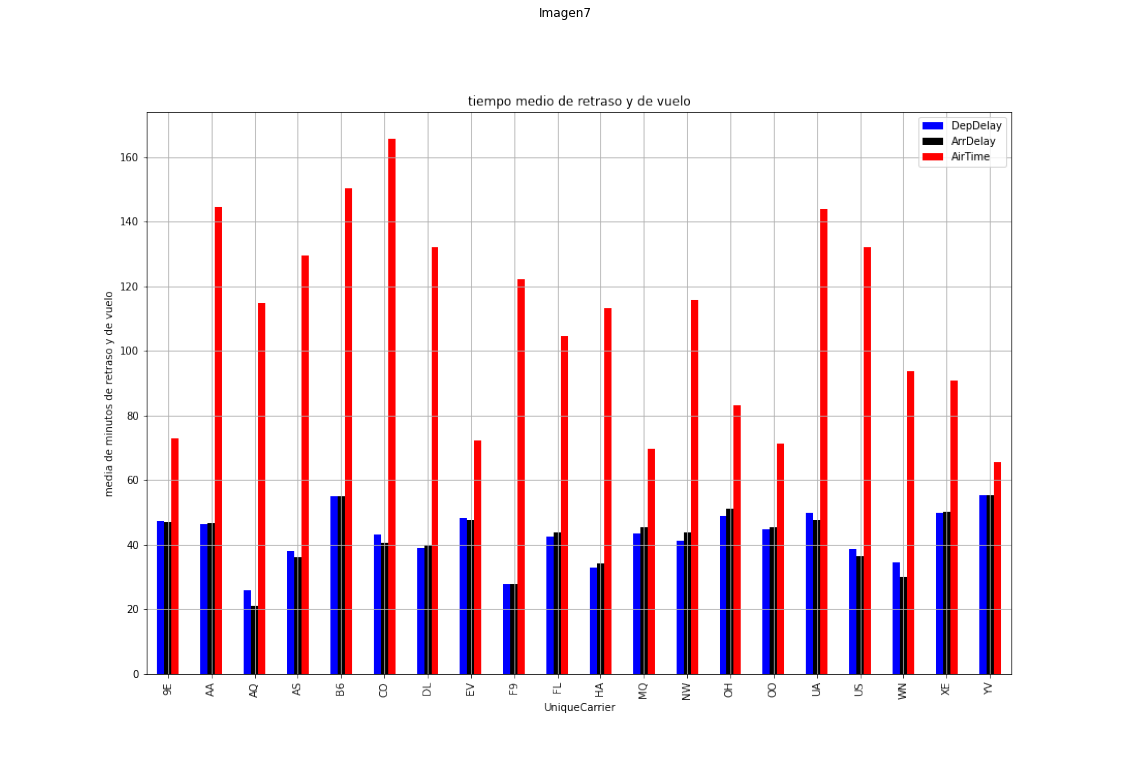

In [37]:
img7 = mpimg.imread("fig7.png")
plt.figure(figsize=(20, 20))
plt.imshow(img7)
plt.title('Imagen7') 
plt.axis('off')
plt.show()

In [28]:
#Limpiar el Data Set exportamos el df10 a excel

# la información me parece bastante relevante en muchas columnas, pero el archivo es demasiado grande como 
#para pasarlo a excell, así que vamos a reducir por fechas(todo vuelos del 2008)

df10["Month"].value_counts()



12    203385
6     200914
3     200842
2     189534
1     183527
7     182945
8     162648
4     155264
5     153072
11    105563
10    103525
9      95539
Name: Month, dtype: int64

In [29]:
# vamos a limpiar a todavía más el DF en columnas
df10.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'Velocidad', 'Cancelled',
       'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Delay'],
      dtype='object')

In [30]:
# opto limpiar por meses
df11 = df10[['Month',  'UniqueCarrier',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'Velocidad', 'Cancelled',
       'Diverted',  'Delay']]
df11 = df11[df11["Month"]>8]
df11.to_excel("Delay.xlsx") 